In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [146]:
#import required libraries

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import category_encoders as ce
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std


In [147]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
df_train

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,10hours,₹25000 - ₹37499,less1,1,gt8,Unmarried partner,Restaurant with pub,50plus,0,0,...,1,1,1,89,never,22,Summer,Location B,0,Yes
12375,2days,₹25000 - ₹37499,4~8,0,never,Single,Take-away restaurant,21,0,0,...,1,1,2,67,never,18,Summer,Location B,0,Yes
12376,10hours,₹87500 - ₹99999,4~8,1,gt8,Married partner,Cold drinks,31,0,1,...,1,0,2,89,gt8,18,Spring,Location B,1,No
12377,10hours,₹12500 - ₹24999,4~8,1,less1,Married partner,2 star restaurant,26,0,0,...,1,0,1,89,less1,7,Summer,Location C,0,Yes


In [148]:
df_test = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')
df_test

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,2days,₹25000 - ₹37499,less1,0,less1,Unmarried partner,4 star restaurant,26,0,0,...,Food Preparation & Serving Related,0,0,1,67,1~3,18,Summer,Location B,0
5301,10hours,₹62500 - ₹74999,1~3,0,4~8,Married partner,2 star restaurant,26,0,0,...,Unemployed,0,0,3,89,1~3,18,Summer,Location B,1
5302,10hours,₹50000 - ₹62499,gt8,1,4~8,Married partner,Cold drinks,36,0,0,...,Arts Design Entertainment Sports & Media,1,1,2,67,1~3,7,Summer,Location C,1
5303,2days,₹50000 - ₹62499,1~3,1,1~3,Married partner,Restaurant with pub,36,1,0,...,Education&Training&Library,1,1,3,89,1~3,7,Summer,Location A,0


In [149]:
df_train['Offer Accepted'].value_counts()

Yes    6994
No     5385
Name: Offer Accepted, dtype: int64

In [150]:
##distribution of data

In [151]:
# dist_names = ['weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon',   
#               'lognorm','pearson3','triang']

In [152]:
# chi_square_statistics = []
# # 11 equi-distant bins of observed Data 
# percentile_bins = np.linspace(0,100,11)
# percentile_cutoffs = np.percentile(y_std, percentile_bins)
# observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
# cum_observed_frequency = np.cumsum(observed_frequency)

# # Loop through candidate distributions
# for distribution in dist_names:
#     # Set up distribution and get fitted distribution parameters
#     dist = getattr(scipy.stats, distribution)
#     param = dist.fit(y_std)
#     print("{}\n{}\n".format(dist, param))


#     # Get expected counts in percentile bins
#     # cdf of fitted sistrinution across bins
#     cdf_fitted = dist.cdf(percentile_cutoffs, *param)
#     expected_frequency = []
#     for bin in range(len(percentile_bins)-1):
#         expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
#         expected_frequency.append(expected_cdf_area)

#     # Chi-square Statistics
#     expected_frequency = np.array(expected_frequency) * size
#     cum_expected_frequency = np.cumsum(expected_frequency)
#     ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
#     chi_square_statistics.append(ss)


# #Sort by minimum ch-square statistics
# results = pd.DataFrame()
# results['Distribution'] = dist_names
# results['chi_square'] = chi_square_statistics
# results.sort_values(['chi_square'], inplace=True)


# print ('\nDistributions listed by Betterment of fit:')
# print ('............................................')
# print (results)

Detecting outliers and its removal

In [153]:
#Extract the numerical features from the dataset
num_var = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['travelled_more_than_15mins_for_offer', 'Prefer western over chinese', 'travelled_more_than_25mins_for_offer', 'travelled_more_than_5mins_for_offer', 'restuarant_same_direction_house', 'Cooks regularly', 'is foodie', 'restuarant_opposite_direction_house', 'has Children', 'visit restaurant with rating (avg)', 'temperature', 'Travel Time', 'Prefer home food']


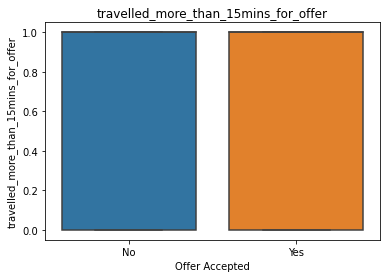

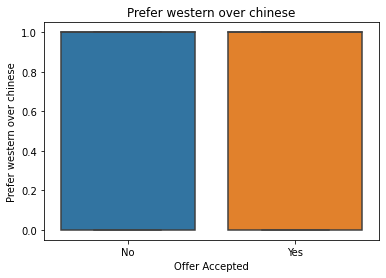

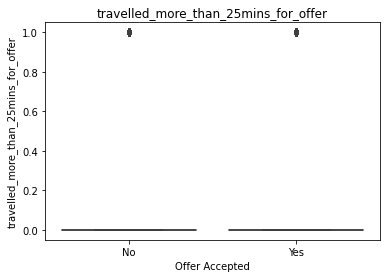

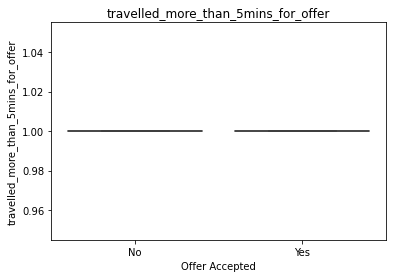

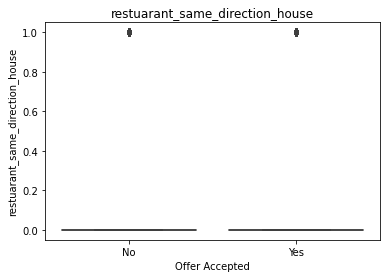

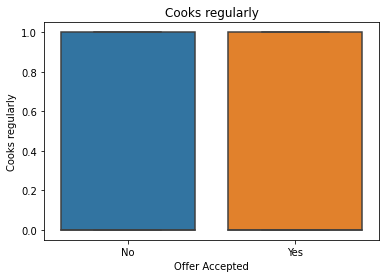

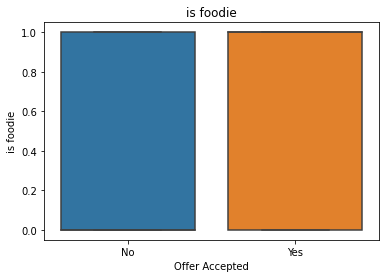

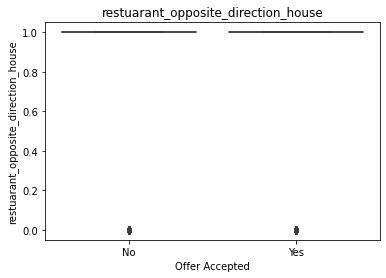

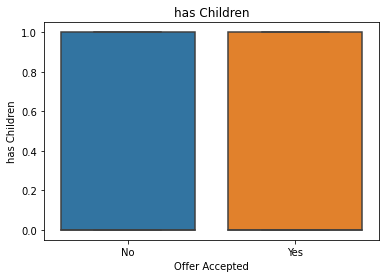

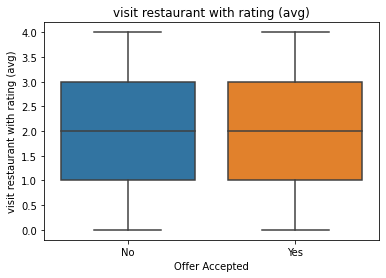

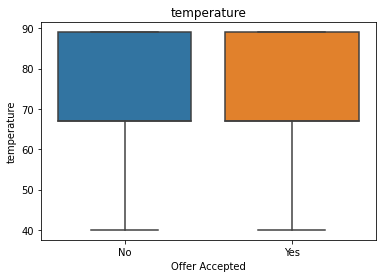

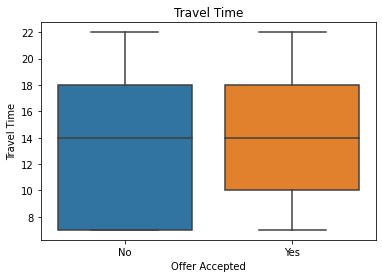

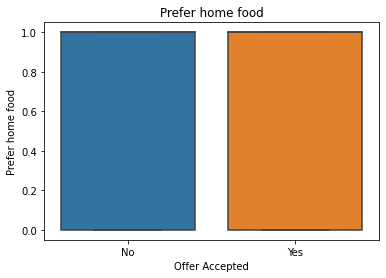

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in num_var:
    if feature != 'Offer Accepted':
        sns.boxplot(x ='Offer Accepted', y = feature, data = df_train)
        plt.title(feature)
        plt.show()

In [155]:
#functions for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return df_train

In [156]:
#df_train = remove_outliers(df_train, num_var)

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [158]:
df_train.isna().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [159]:
df_train=df_train.drop('car', axis=1)

In [160]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [161]:
#steps = [ ('impt',SimpleImputer(strategy='most_frequent')),('labelenc',LabelEncoder())]

In [162]:
imp = SimpleImputer(strategy='most_frequent')
df_trainI=imp.fit_transform(df_train)
df_trainI

array([['2days', '₹100000 or More', '4~8', ..., 'Location B', 0, 'No'],
       ['2days', '₹87500 - ₹99999', '4~8', ..., 'Location B', 0, 'Yes'],
       ['2days', '₹87500 - ₹99999', 'less1', ..., 'Location A', 1, 'Yes'],
       ...,
       ['10hours', '₹87500 - ₹99999', '4~8', ..., 'Location B', 1, 'No'],
       ['10hours', '₹12500 - ₹24999', '4~8', ..., 'Location C', 0, 'Yes'],
       ['2days', '₹37500 - ₹49999', '1~3', ..., 'Location A', 1, 'Yes']],
      dtype=object)

In [163]:
df_train = pd.DataFrame(data=df_trainI, columns=df_train.columns)
df_train.head(5)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [164]:
df_train.isnull().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
travelled_more_than_5mins_for_offer     0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                       

In [165]:
le = LabelEncoder()
df_train['Offer Accepted'] = le.fit_transform(df_train['Offer Accepted'])
df_train

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,0
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,1
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,1
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,0
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,10hours,₹25000 - ₹37499,less1,1,gt8,Unmarried partner,Restaurant with pub,50plus,0,0,...,1,1,1,89,never,22,Summer,Location B,0,1
12375,2days,₹25000 - ₹37499,4~8,0,never,Single,Take-away restaurant,21,0,0,...,1,1,2,67,never,18,Summer,Location B,0,1
12376,10hours,₹87500 - ₹99999,4~8,1,gt8,Married partner,Cold drinks,31,0,1,...,1,0,2,89,gt8,18,Spring,Location B,1,0
12377,10hours,₹12500 - ₹24999,4~8,1,less1,Married partner,2 star restaurant,26,0,0,...,1,0,1,89,less1,7,Summer,Location C,0,1


In [166]:
col = df_train.columns

In [167]:
lis = ['offer expiration', 'income_range', 'no_visited_Cold drinks', 'Restaur_spend_less_than20', 'Marital Status', 'restaurant type', 'age', 'no_visited_bars', 'gender','Customer type', 'Qualification', 'no_Take-aways', 'Job/Job Industry', 'Restaur_spend_greater_than20', 'Climate', 'drop location']
# ct = ColumnTransformer([("enc", OrdinalEncoder(),lis)],remainder='passthrough')
# df_train_ct = ct.fit_transform(df_train)
df_train_ct = pd.get_dummies(data=df_train[col[:-1]])
df_train_ct.columns

Index(['offer expiration_10hours', 'offer expiration_2days',
       'income_range_Less than ₹12500', 'income_range_₹100000 or More',
       'income_range_₹12500 - ₹24999', 'income_range_₹25000 - ₹37499',
       'income_range_₹37500 - ₹49999', 'income_range_₹50000 - ₹62499',
       'income_range_₹62500 - ₹74999', 'income_range_₹75000 - ₹87499',
       ...
       'Travel Time_18', 'Travel Time_22', 'Climate_Spring', 'Climate_Summer',
       'Climate_Winter', 'drop location_Location A',
       'drop location_Location B', 'drop location_Location C',
       'Prefer home food_0', 'Prefer home food_1'],
      dtype='object', length=129)

In [168]:
df_train_ct.columns

Index(['offer expiration_10hours', 'offer expiration_2days',
       'income_range_Less than ₹12500', 'income_range_₹100000 or More',
       'income_range_₹12500 - ₹24999', 'income_range_₹25000 - ₹37499',
       'income_range_₹37500 - ₹49999', 'income_range_₹50000 - ₹62499',
       'income_range_₹62500 - ₹74999', 'income_range_₹75000 - ₹87499',
       ...
       'Travel Time_18', 'Travel Time_22', 'Climate_Spring', 'Climate_Summer',
       'Climate_Winter', 'drop location_Location A',
       'drop location_Location B', 'drop location_Location C',
       'Prefer home food_0', 'Prefer home food_1'],
      dtype='object', length=129)

In [169]:
df_train_ct[col[-1]] = df_train[col[-1]]
df_train_ct

,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1,Offer Accepted
0,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
12375,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
12376,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
12377,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1


In [170]:
# sc_X = StandardScaler() 
sc_X = MinMaxScaler()
sc_X = sc_X.fit_transform(df_train_ct)
print(sc_X)

[[0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 1.]]


In [171]:
df_train_model = pd.DataFrame(data=sc_X, columns=df_train_ct.columns)
df_train_model

,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1,Offer Accepted
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
12375,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
12376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


Processing test Data

In [172]:
df_train_model[col[-1]] = df_train[col[-1]]
df_train_model

,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1,Offer Accepted
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
12375,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
12376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
12377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [173]:
df_train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Columns: 130 entries, offer expiration_10hours to Offer Accepted
dtypes: float64(129), int64(1)
memory usage: 12.3 MB


In [174]:
df_test

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,2days,₹25000 - ₹37499,less1,0,less1,Unmarried partner,4 star restaurant,26,0,0,...,Food Preparation & Serving Related,0,0,1,67,1~3,18,Summer,Location B,0
5301,10hours,₹62500 - ₹74999,1~3,0,4~8,Married partner,2 star restaurant,26,0,0,...,Unemployed,0,0,3,89,1~3,18,Summer,Location B,1
5302,10hours,₹50000 - ₹62499,gt8,1,4~8,Married partner,Cold drinks,36,0,0,...,Arts Design Entertainment Sports & Media,1,1,2,67,1~3,7,Summer,Location C,1
5303,2days,₹50000 - ₹62499,1~3,1,1~3,Married partner,Restaurant with pub,36,1,0,...,Education&Training&Library,1,1,3,89,1~3,7,Summer,Location A,0


In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      5305 non-null   object
 1   income_range                          5305 non-null   object
 2   no_visited_Cold drinks                5215 non-null   object
 3   travelled_more_than_15mins_for_offer  5305 non-null   int64 
 4   Restaur_spend_less_than20             5244 non-null   object
 5   Marital Status                        5305 non-null   object
 6   restaurant type                       5305 non-null   object
 7   age                                   5305 non-null   object
 8   Prefer western over chinese           5305 non-null   int64 
 9   travelled_more_than_25mins_for_offer  5305 non-null   int64 
 10  travelled_more_than_5mins_for_offer   5305 non-null   int64 
 11  no_visited_bars               

In [176]:
df_test=df_test.drop('car', axis=1)

In [177]:
#steps = [('imp',SimpleImputer(strategy='most_frequent'), ('coltransf',ColumnTransformer([("enc", OrdinalEncoder(),lis)],remainder='passthrough')) )]

In [178]:
# pipe = Pipeline(steps)
# pipe.fit()

In [179]:
imp = SimpleImputer(strategy='most_frequent')
df_testI=imp.fit_transform(df_test)
df_testI

array([['2days', '₹37500 - ₹49999', '1~3', ..., 'Summer', 'Location C',
        0],
       ['10hours', '₹25000 - ₹37499', '4~8', ..., 'Summer', 'Location A',
        1],
       ['2days', '₹100000 or More', 'never', ..., 'Summer', 'Location C',
        0],
       ...,
       ['10hours', '₹50000 - ₹62499', 'gt8', ..., 'Summer', 'Location C',
        1],
       ['2days', '₹50000 - ₹62499', '1~3', ..., 'Summer', 'Location A',
        0],
       ['2days', '₹37500 - ₹49999', 'less1', ..., 'Winter', 'Location A',
        0]], dtype=object)

In [180]:
df_test = pd.DataFrame(data=df_testI, columns=df_test.columns)
df_test.head(5)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1


In [181]:
lis = ['offer expiration', 'income_range', 'no_visited_Cold drinks', 'Restaur_spend_less_than20', 'Marital Status', 'restaurant type', 'age', 'no_visited_bars', 'gender','Customer type', 'Qualification', 'no_Take-aways', 'Job/Job Industry', 'Restaur_spend_greater_than20', 'Climate', 'drop location']
# ct = ColumnTransformer([("enc", OrdinalEncoder(),lis)],remainder='passthrough')
# df_test_ct = ct.fit_transform(df_test)
df_test_ct = pd.get_dummies(data=df_test)
df_test_ct.columns

Index(['offer expiration_10hours', 'offer expiration_2days',
       'income_range_Less than ₹12500', 'income_range_₹100000 or More',
       'income_range_₹12500 - ₹24999', 'income_range_₹25000 - ₹37499',
       'income_range_₹37500 - ₹49999', 'income_range_₹50000 - ₹62499',
       'income_range_₹62500 - ₹74999', 'income_range_₹75000 - ₹87499',
       ...
       'Travel Time_18', 'Travel Time_22', 'Climate_Spring', 'Climate_Summer',
       'Climate_Winter', 'drop location_Location A',
       'drop location_Location B', 'drop location_Location C',
       'Prefer home food_0', 'Prefer home food_1'],
      dtype='object', length=129)

In [182]:
df_test_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Columns: 129 entries, offer expiration_10hours to Prefer home food_1
dtypes: uint8(129)
memory usage: 668.4 KB


In [183]:
df_test_ct.isnull().sum()

offer expiration_10hours         0
offer expiration_2days           0
income_range_Less than ₹12500    0
income_range_₹100000 or More     0
income_range_₹12500 - ₹24999     0
                                ..
drop location_Location A         0
drop location_Location B         0
drop location_Location C         0
Prefer home food_0               0
Prefer home food_1               0
Length: 129, dtype: int64

Outlier Detection and Removal
Draw Candle Plot for outliers

In [184]:
df_test_ct.isna().sum()

offer expiration_10hours         0
offer expiration_2days           0
income_range_Less than ₹12500    0
income_range_₹100000 or More     0
income_range_₹12500 - ₹24999     0
                                ..
drop location_Location A         0
drop location_Location B         0
drop location_Location C         0
Prefer home food_0               0
Prefer home food_1               0
Length: 129, dtype: int64

In [185]:
# sc_X = StandardScaler()
sc_X = MinMaxScaler()
sc_X = sc_X.fit_transform(df_test_ct)
print(sc_X)

[[0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [186]:
df_test_model = pd.DataFrame(data=sc_X, columns=df_test_ct.columns)
df_test_model

,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_18,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5302,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


---
## Splitting Data into Train and Test

Divide data into train validation and test test

In [187]:
#define X and Y
df_X = df_train_model.drop(['Offer Accepted'], axis=1)
df_X


,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_18,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12375,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [188]:
df_y = df_train_model['Offer Accepted']
df_y

0        0
1        1
2        1
3        0
4        0
        ..
12374    1
12375    1
12376    0
12377    1
12378    1
Name: Offer Accepted, Length: 12379, dtype: int64

In [189]:
df_X

,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_18,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12375,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [190]:
from sklearn.model_selection import train_test_split
train_ratio = 0.80
#validation_ratio = 0.15
test_ratio = 0.20

# train is now 75% of the entire data set

x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=1 - train_ratio) # test size is 25%

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))  


In [191]:
x_train

,offer expiration_10hours,offer expiration_2days,income_range_Less than ₹12500,income_range_₹100000 or More,income_range_₹12500 - ₹24999,income_range_₹25000 - ₹37499,income_range_₹37500 - ₹49999,income_range_₹50000 - ₹62499,income_range_₹62500 - ₹74999,income_range_₹75000 - ₹87499,...,Travel Time_18,Travel Time_22,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,Prefer home food_0,Prefer home food_1
9626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
10762,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
11101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1532,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
411,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
119,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5445,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4076,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [192]:
y_train

9626     1
10762    0
11101    1
1532     1
411      1
        ..
145      0
119      0
5445     1
4076     1
11264    0
Name: Offer Accepted, Length: 9903, dtype: int64

In [193]:
# #data scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# #X_test = sc.transform(x_test)
# x_train

In [194]:
#SVC
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.6312600969305331
Classification report: 
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      1040
           1       0.65      0.78      0.71      1436

    accuracy                           0.63      2476
   macro avg       0.62      0.60      0.60      2476
weighted avg       0.62      0.63      0.62      2476

Confusion Matrix
[[ 438  602]
 [ 311 1125]]
Cohen kappa score: 
0.21278960762545784


In [195]:
#random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.6385298869143781
Classification report: 
              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1040
           1       0.66      0.79      0.72      1436

    accuracy                           0.64      2476
   macro avg       0.63      0.61      0.61      2476
weighted avg       0.63      0.64      0.63      2476

Confusion Matrix
[[ 451  589]
 [ 306 1130]]
Cohen kappa score: 
0.22916002855143214


In [196]:
#XGB classifier
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.6445880452342488
Classification report: 
              precision    recall  f1-score   support

           0       0.61      0.41      0.49      1040
           1       0.66      0.81      0.73      1436

    accuracy                           0.64      2476
   macro avg       0.64      0.61      0.61      2476
weighted avg       0.64      0.64      0.63      2476

Confusion Matrix
[[ 430  610]
 [ 270 1166]]
Cohen kappa score: 
0.23608111519367236


In [197]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.6183360258481422
Classification report: 
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1040
           1       0.65      0.75      0.69      1436

    accuracy                           0.62      2476
   macro avg       0.60      0.59      0.59      2476
weighted avg       0.61      0.62      0.61      2476

Confusion Matrix
[[ 457  583]
 [ 362 1074]]
Cohen kappa score: 
0.19298853127789406


In [198]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.6151050080775444
Classification report: 
              precision    recall  f1-score   support

           0       0.56      0.42      0.48      1040
           1       0.64      0.76      0.69      1436

    accuracy                           0.62      2476
   macro avg       0.60      0.59      0.59      2476
weighted avg       0.61      0.62      0.60      2476

Confusion Matrix
[[ 438  602]
 [ 351 1085]]
Cohen kappa score: 
0.18280828569093377


In [199]:
#KNN
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  

print('n_neighbors')
y_pred = knn.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

n_neighbors
Accuracy: 
0.6074313408723748
Classification report: 
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1040
           1       0.68      0.62      0.65      1436

    accuracy                           0.61      2476
   macro avg       0.60      0.61      0.60      2476
weighted avg       0.61      0.61      0.61      2476

Confusion Matrix
[[616 424]
 [548 888]]
Cohen kappa score: 
0.20728435986487415


In [200]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.5779483037156704
Classification report: 
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1040
           1       0.65      0.60      0.62      1436

    accuracy                           0.58      2476
   macro avg       0.57      0.57      0.57      2476
weighted avg       0.58      0.58      0.58      2476

Confusion Matrix
[[575 465]
 [580 856]]
Cohen kappa score: 
0.14674748220892886


In [201]:
# define the model
model = XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.611 (0.013)


In [202]:
# define the model
model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.621 (0.015)


In [203]:
# define the model
model = LGBMClassifier(max_bin=255, n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.623 (0.016)
